<a href="https://colab.research.google.com/github/zadevaibhav45/ml-odel/blob/master/Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Inspecting transfusion.data file**

In [57]:
!head -n5 transfusion.data

Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),"whether he/she donated blood in March 2007"
2 ,50,12500,98 ,1
0 ,13,3250,28 ,1
1 ,16,4000,35 ,1
2 ,20,5000,45 ,1


# **2. Loading the blood donations data**

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
transfusion = pd.read_csv('transfusion.data')
transfusion

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [59]:
transfusion.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# **3. Inspecting transfusion DataFrame **

In [61]:
transfusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [62]:
transfusion.shape

(748, 5)

In [63]:
#For Checking NULL Values
transfusion.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [64]:
transfusion.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [65]:
transfusion.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


# **4. Creating target column**

In [66]:
# Rename target column as 'target'
transfusion.rename(columns={'whether he/she donated blood in March 2007': 'target'},inplace=True)
transfusion.head(2)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1


# **5. Checking target incidence**

In [67]:
#Print target incidence proportions, rounding output to 3 decimal places
transfusion['target'].value_counts(normalize=True).round(3)

0    0.762
1    0.238
Name: target, dtype: float64

# **6. Splitting transfusion into train and test datasets**

In [68]:
# Import train_test_split method
from sklearn.model_selection import train_test_split

# Split transfusion DataFrame into
# X_train, X_test, y_train and y_test datasets,
# stratifying on the `target` column
X_train, X_test, y_train, y_test = train_test_split(
    transfusion.drop(columns='target'),
    transfusion.target,
    test_size=0.25,
    random_state=42,
    stratify=transfusion.target
)

# Print out the first 2 rows of X_train
X_train.head(2)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
334,16,2,500,16
99,5,7,1750,26


# **7. Selecting model using TPOT**


In [69]:
!pip install TPOT

In [70]:
# Import TPOTClassifier and roc_auc_score
from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score

# Instantiate TPOTClassifier
tpot = TPOTClassifier(
    generations=5,
    population_size=20,
    verbosity=2,
    scoring='roc_auc',
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)
tpot.fit(X_train, y_train)

# AUC score for tpot model
tpot_auc_score = roc_auc_score(y_test, tpot.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')

# Print best pipeline steps
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    
    print(f'{idx}. {transform}')


Generation 1 - Current best internal CV score: 0.7422459184429089

Generation 2 - Current best internal CV score: 0.7422459184429089

Generation 3 - Current best internal CV score: 0.7422459184429089

Generation 4 - Current best internal CV score: 0.7422459184429089

Generation 5 - Current best internal CV score: 0.7456308339276876

Best pipeline: MultinomialNB(Normalizer(input_matrix, norm=l2), alpha=0.001, fit_prior=True)

AUC score: 0.7637

Best pipeline steps:
1. Normalizer(copy=True, norm='l2')
2. MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)


# **8. Checking the variance**

In [71]:
# X_train's variance, rounding the output to 3 decimal places
X_train.var().round(3)

Recency (months)              66.929
Frequency (times)             33.830
Monetary (c.c. blood)    2114363.700
Time (months)                611.147
dtype: float64

# **9. Log normalization**

In [72]:
# Copy X_train and X_test into X_train_normed and X_test_normed
X_train_normed, X_test_normed = X_train.copy(), X_test.copy()

# Specify which column to normalize
col_to_normalize = 'Monetary (c.c. blood)'

# Log normalization
for df_ in [X_train_normed, X_test_normed]:
    # Add log normalized column
    df_['monetary_log'] = np.log(df_[col_to_normalize])
    # Drop the original column
    df_.drop(columns=col_to_normalize, inplace=True)

# Check the variance for X_train_normed

X_train_normed.var().round(3)

Recency (months)      66.929
Frequency (times)     33.830
Time (months)        611.147
monetary_log           0.837
dtype: float64

# **10. Training the linear regression model**

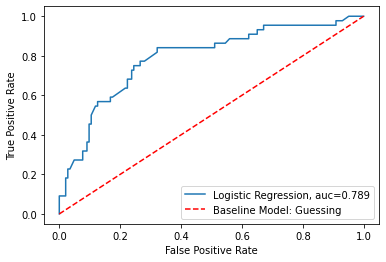


AUC score: 0.7890

Log Loss: 0.4476


In [73]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import log_loss

# Instantiate LogisticRegression
logreg = linear_model.LogisticRegression(
    solver='liblinear',
    random_state=42
)

# Train the model
logreg.fit(X_train_normed, y_train)
y_pred = logreg.predict(X_test_normed)

# AUC score for tpot model
logreg_auc_score = roc_auc_score(y_test, logreg.predict_proba(X_test_normed)[:, 1])
y_pred_proba = logreg.predict_proba(X_test_normed)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc.round(4)))
plt.plot([0, 1], [0, 1],'r--', label = 'Baseline Model: Guessing')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
print(f'\nAUC score: {logreg_auc_score:.4f}')
print(f'\nLog Loss: {log_loss(y_test, logreg.predict_proba(X_test_normed)[:, 1]):.4f}')


Accuracy: 0.7754010695187166
Precision: 0.625
Recall: 0.11363636363636363


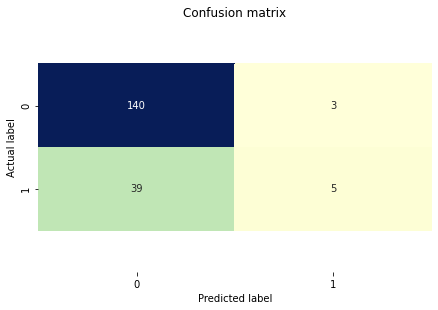

In [74]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes

# HEATMAP
ax = sns.heatmap(cnf_matrix, annot = True ,  cmap="YlGnBu",  fmt ='d', cbar = False)
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# **11. Conclusion**

The demand for blood fluctuates throughout the year. As one prominent example, blood donations slow down during busy holiday seasons. An accurate forecast for the future supply of blood allows for an appropriate action to be taken ahead of time and therefore saving more lives.

In this notebook, we explored automatic model selection using TPOT and AUC score we got was 0.7637. This is better than simply choosing 0 all the time (the target incidence suggests that such a model would have 76% success rate). We then log normalized our training data and improved the AUC score by approx. 1.00% i.e 0.7890 In the field of machine learning, even small improvements in accuracy can be important, depending on the purpose.

In [75]:
 #Importing itemgetter
from operator import itemgetter

# Sort models based on their AUC score from highest to lowest
sorted(
    [('tpot', tpot_auc_score), ('logreg', logreg_auc_score)],
    key=itemgetter(1),
    reverse=True)

[('logreg', 0.7890178003814368), ('tpot', 0.7637476160203432)]